### Wave2D Test

Utt = Uxx + f(t,x,y) 

f(t,x,y) = oscillating bump on [-1,1]x[-1,1] 

Robin boundary Conditions damping * U + Ux = 0 

Initial Condition: U(t=0, x,y) = 0

In [8]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import PyFds

In [12]:
domain = PyFds.MeshXD(-10.0,10.0,31,2) 
time = np.linspace(0, 30.0, 101) 
ICs = [ np.zeros(domain.sizes_product()) for i in [0,1]]

interp = PyFds.Wave2D()
interp.SetDomain(domain)
interp.SetTime(PyFds.Mesh1D(time))
interp.SetIC(ICs)
interp.SetDamping(1.0)
interp.SetHeight(3.0)

In [13]:
interp.Compute()

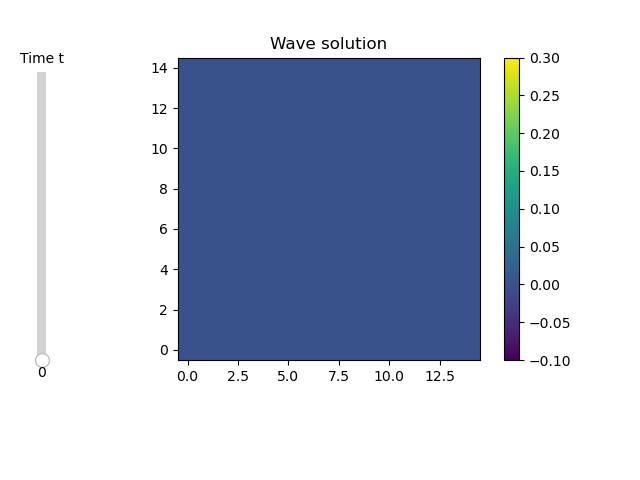

In [14]:
# pip install ipympl
%matplotlib widget
from matplotlib.widgets import Slider
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.25)

x_axis = domain.GetMesh(0)
xs = np.linspace(x_axis.at(0), x_axis.at(x_axis.size()-1), 15)
y_axis = domain.GetMesh(1) 
ys = np.linspace(y_axis.at(0), y_axis.at(y_axis.size()-1), 15) 

# slider axis
axtime = fig.add_axes([0.05, 0.25, 0.03, 0.6])

t_slider = Slider(
    ax=axtime,
    label='Time t',
    valmin=time[0],
    valmax=time[-1],
    valinit=0.0,
    orientation="vertical"
)

# initial image
img = np.array([[interp.SolAt(0.0, x, y) for x in xs] for y in ys])
im = ax.imshow(img, vmin=-0.1, vmax=0.3, origin="lower")

ax.set_title("Wave solution")
plt.colorbar(im, ax=ax)

def update(t):
    img = interp.StoredData()[ np.argmin(time <= t) ]
    img.resize([domain.GetMesh(0).size(), domain.GetMesh(1).size()])
    # img = np.array([[interp.SolAt(t, x, y) for x in xs] for y in ys])
    im.set_data(img)
    fig.canvas.draw_idle()

t_slider.on_changed(update)

plt.show()